In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)


In [ ]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knr.score(x_test, y_test)

0.18038800492279672

KNR Neighbors Search

In [ ]:
nums = np.arange(1,20).tolist()
scores = []
for i in range(len(nums)):
  knr = KNeighborsRegressor(n_neighbors=i+1, n_jobs=6)
  knr.fit(x_train, y_train)
  scores.append(knr.score(x_test, y_test))
  print(i+1, ': ' , scores[i])


1 :  -0.16900122451389543
2 :  0.18038800492279672
3 :  0.2630879362261167
4 :  0.3023392170509589
5 :  0.32544860658470787
6 :  0.3394832375037087
7 :  0.3478266117568871
8 :  0.351077871620028
9 :  0.3529868295730402
10 :  0.35589831846854647
11 :  0.3579177622381504
12 :  0.3599640033968162
13 :  0.3610401297147324
14 :  0.3617478920259869
15 :  0.36216097960978066
16 :  0.3615064347828243
17 :  0.3603951125139524
18 :  0.3591169453289954
19 :  0.35802380657637767


Text(0, 0.5, 'Model Score')

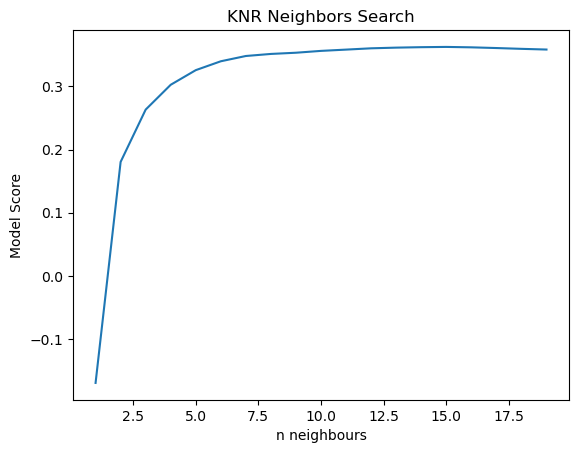

In [ ]:
plt.plot(nums, scores)
plt.title('KNR Neighbors Search')
plt.xlabel('n neighbours')
plt.ylabel('Model Score')

In [ ]:
np.argmax(scores)

14

In [ ]:
scores[np.argmax(scores)]

0.36216097960978066

In [ ]:
knr = KNeighborsRegressor(n_neighbors=np.argmax(scores)+1)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [6]:
knr = KNeighborsRegressor(n_neighbors=15)
knr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [7]:
y_pred = knr.predict(x_test)

mean_squared_error(y_test, y_pred)

62.96356344720179

In [8]:
mean_absolute_error(y_test, y_pred)

6.14763632669891

Predict the test set

In [45]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
#url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

Final Submission Format:

Id,Weekly_Sales

1_1_2012-11-02,0

1_1_2012-11-09,0

1_1_2012-11-16,0

In [46]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [47]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [48]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842


In [49]:
y_pred = knr.predict(submission_test)
y_pred

array([[28.16380144],
       [27.9649    ],
       [27.43963178],
       ...,
       [25.93219353],
       [24.20189397],
       [23.94883829]])

We previously scaled down the weekly sales by cube rooting the values and since these are dollar values, the final number is rounded to the nearest 2 decimals 

In [50]:
weekly_sales = np.round(y_pred[:,0]**3, 2)
weekly_sales

array([22339.52, 21869.55, 20660.22, ..., 17438.85, 14175.82, 13735.78])

In [51]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
knr_submission = pd.DataFrame(data=sub)
knr_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,22339.52
1,1_1_2012-11-09,21869.55
2,1_1_2012-11-16,20660.22
3,1_1_2012-11-23,20660.22
4,1_1_2012-11-30,20660.22
...,...,...
115059,45_98_2013-06-28,23818.78
115060,45_98_2013-07-05,22719.83
115061,45_98_2013-07-12,17438.85
115062,45_98_2013-07-19,14175.82


In [52]:
knr_submission.to_csv('Submission Files/KNR 1.csv', float_format='%.2f',index=False)